Importing the necessary main libraries

In [617]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Connecting the two data sets together and making it one 

In [618]:
columns =["age","workclass","fnlwgt","education","education.num","marital.status","occupation","relationship","race","sex","capital.gain","capital.loss","hours.per.week","native.country","income"]
training_f = pd.read_csv("adult.data", sep=",\s", header = None, engine = 'python',names=columns)
testing_f = pd.read_csv("adult.test", sep=",\s", header = None, engine = 'python',names=columns)

testing_f.loc[:, 'income'] = testing_f['income'].replace(regex=True, to_replace=r'\.', value=r'') # remove the period in the income column
data_f = pd.concat([testing_f,training_f]) # combines the two dataframes and makes it one 
data_f.reset_index(drop=True, inplace=True)
data_f

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,|1x3 Cross validator,None,NaN,None,NaN,None,None,None,None,None,NaN,NaN,NaN,None,None
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48838,27,Private,257302.0,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.0,38.0,United-States,<=50K
48839,40,Private,154374.0,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
48840,58,Private,151910.0,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K
48841,22,Private,201490.0,HS-grad,9.0,Never-married,Adm-clerical,Own-child,White,Male,0.0,0.0,20.0,United-States,<=50K


In [619]:
data_f = data_f.drop(index=0) # drop the first row of the dataframe
data_f = data_f.reset_index(drop=True)
data_f

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
1,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
2,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
3,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
4,18,?,103497.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302.0,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.0,38.0,United-States,<=50K
48838,40,Private,154374.0,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
48839,58,Private,151910.0,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K
48840,22,Private,201490.0,HS-grad,9.0,Never-married,Adm-clerical,Own-child,White,Male,0.0,0.0,20.0,United-States,<=50K


Checking data types and converting the age into a float as well

In [620]:
data_f.dtypes

age                object
workclass          object
fnlwgt            float64
education          object
education.num     float64
marital.status     object
occupation         object
relationship       object
race               object
sex                object
capital.gain      float64
capital.loss      float64
hours.per.week    float64
native.country     object
income             object
dtype: object

In [621]:
data_f['age'] = data_f['age'].astype('float64')
data_f.dtypes


age               float64
workclass          object
fnlwgt            float64
education          object
education.num     float64
marital.status     object
occupation         object
relationship       object
race               object
sex                object
capital.gain      float64
capital.loss      float64
hours.per.week    float64
native.country     object
income             object
dtype: object

Checking for null values 

In [622]:
data_f.isnull().sum() # check for null/missing values

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

76.1% has a salary greater than $50K and only 23.9% has a salary less than $50k , therefore it means that there is an imblanace in the dataset. 

([<matplotlib.patches.Wedge at 0x389b596f0>,
 [Text(0.13270858417163967, -1.0919653985759616, '<=50K'),
  Text(-0.13270853305305033, 1.0919654047884977, '>50K')],
 [Text(0.07238650045725799, -0.5956174901323427, '76.1%'),
  Text(-0.07238647257439108, 0.5956174935209987, '23.9%')])

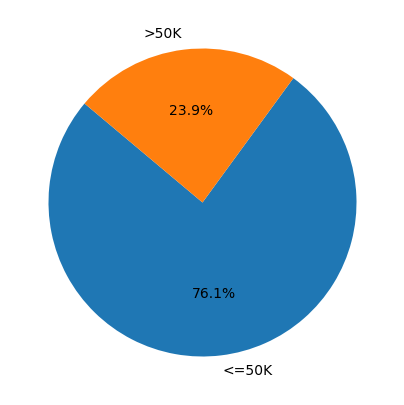

In [623]:
inc_amounts = data_f['income'].value_counts() # counting the number of unique values in the income column

plt.figure(figsize=(5,5))
plt.pie(inc_amounts, labels=inc_amounts.index, autopct='%1.1f%%', startangle=140) 

Checking what values the categorical columns contain 

In [624]:
from collections import Counter 

# getting the unique values of the columns

workclass_v = dict(Counter(data_f['workclass'])).keys() 
education_v = dict(Counter(data_f['education'])).keys()
marital_status_v = dict(Counter(data_f['marital.status'])).keys()
occupation_v= dict(Counter(data_f['occupation'])).keys()
relationship_v = dict(Counter(data_f['relationship'])).keys()
race_v = dict(Counter(data_f['race'])).keys()
nationality_v = dict(Counter(data_f['native.country'])).keys()
sex_v = dict(Counter(data_f['sex'])).keys()

print('Work Class:', list(workclass_v), '\n')
print('Education:', list(education_v), '\n')
print('Marital Status:', list(marital_status_v), '\n')
print('Occupation:', list(occupation_v), '\n')
print('Relationship:', list(relationship_v), '\n')
print('Race:', list(race_v), '\n')
print('Nationality:', list(nationality_v), '\n')
print('Sex:', list(sex_v), '\n')

Work Class: ['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov', 'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'] 

Education: ['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th', 'Prof-school', '7th-8th', 'Bachelors', 'Masters', 'Doctorate', '5th-6th', 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool'] 

Marital Status: ['Never-married', 'Married-civ-spouse', 'Widowed', 'Divorced', 'Separated', 'Married-spouse-absent', 'Married-AF-spouse'] 

Occupation: ['Machine-op-inspct', 'Farming-fishing', 'Protective-serv', '?', 'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical', 'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv', 'Transport-moving', 'Handlers-cleaners', 'Armed-Forces'] 

Relationship: ['Own-child', 'Husband', 'Not-in-family', 'Unmarried', 'Wife', 'Other-relative'] 

Race: ['Black', 'White', 'Asian-Pac-Islander', 'Other', 'Amer-Indian-Eskimo'] 

Nationality: ['United-States', '?', 'Peru', 'Guatemala', 'Mexico', 'Dominican-Rep

Checks the rows which have " ? " symbol instead of any values

In [625]:
columns_with_question_mark = data_f.columns[data_f.isin(['?']).any()] # checking for columns with '?' values

print("Columns with '?' values:")
print(columns_with_question_mark)

Columns with '?' values:
Index(['workclass', 'occupation', 'native.country'], dtype='object')


Drops the rows with the "?" symbol in them

In [626]:
data_f[data_f == '?'] = np.nan 
data_f = data_f.dropna()
data_f

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,25.0,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
1,38.0,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
2,28.0,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
3,44.0,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
5,34.0,Private,198693.0,10th,6.0,Never-married,Other-service,Not-in-family,White,Male,0.0,0.0,30.0,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27.0,Private,257302.0,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.0,38.0,United-States,<=50K
48838,40.0,Private,154374.0,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
48839,58.0,Private,151910.0,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K
48840,22.0,Private,201490.0,HS-grad,9.0,Never-married,Adm-clerical,Own-child,White,Male,0.0,0.0,20.0,United-States,<=50K


This bar chart gives a detailed description of the capital gain with gender and race

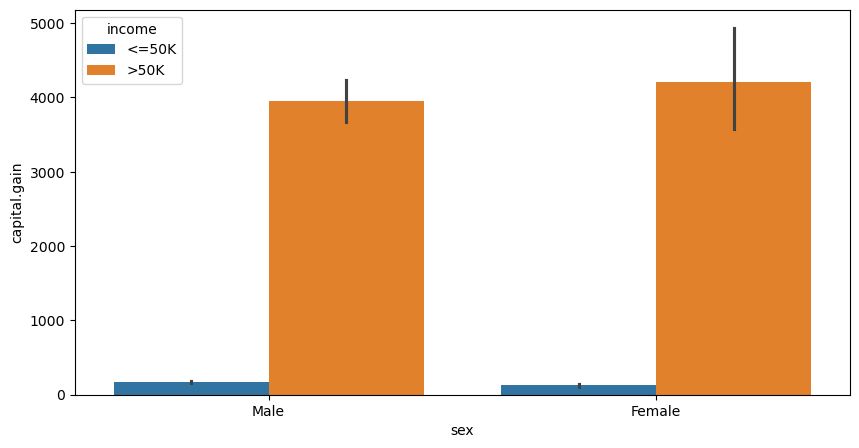

In [627]:
plt.figure(figsize=(10,5))
sns.barplot(x ='sex' , y='capital.gain', data = data_f,hue='income')
plt.xlabel=('Sex')
plt.ylabel=('Capital Gain')

This gives the capital gain with the educational level

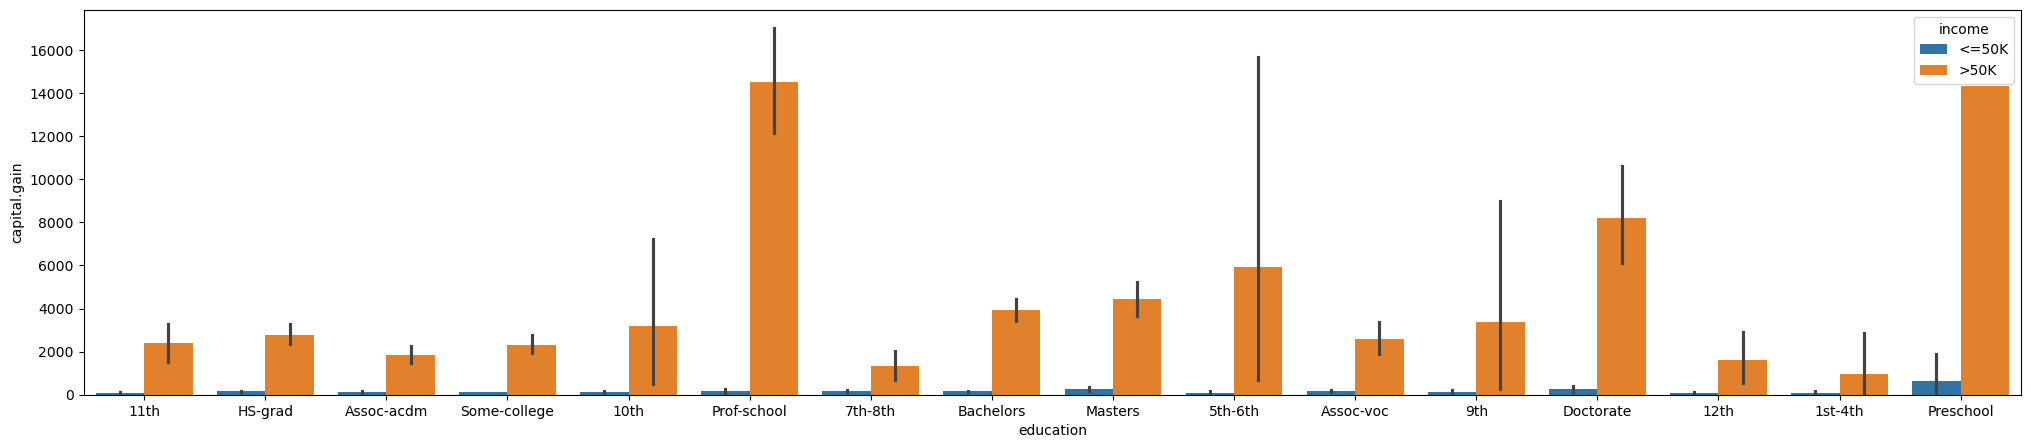

In [628]:
plt.figure(figsize=(25,5))
sns.barplot(x ='education' , y='capital.gain', data = data_f, hue='income')
plt.xlabel=('Sex')
plt.ylabel=('Capital Gain')

This gives the capital gain with the marital status

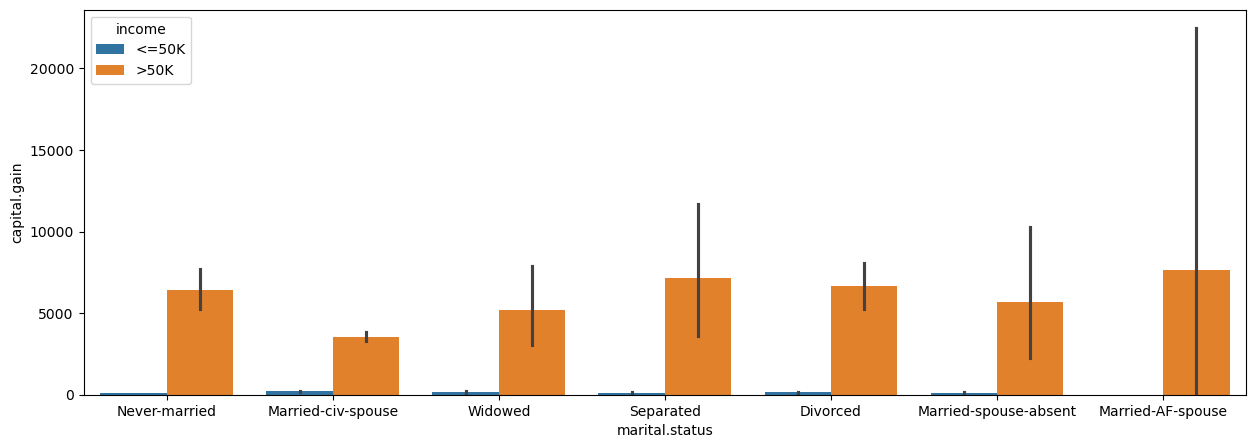

In [629]:
plt.figure(figsize=(15,5))
sns.barplot(x ='marital.status' , y='capital.gain', data = data_f, hue='income')
plt.xlabel=('Sex')
plt.ylabel=('Capital Gain')

Convertion of the categorical variable "income" into a numerical format 

In [630]:
data_f['income'].replace({'<=50K':0, '>50K':1}, inplace=True)
data_f

/var/folders/dc/5z3pbmdn0y7432jf8nxdqh9r0000gn/T/ipykernel_10928/1548234469.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_f['income'].replace({'<=50K':0, '>50K':1}, inplace=True)
/var/folders/dc/5z3pbmdn0y7432jf8nxdqh9r0000gn/T/ipykernel_10928/1548234469.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downc

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,25.0,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,0
1,38.0,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,0
2,28.0,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,1
3,44.0,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,1
5,34.0,Private,198693.0,10th,6.0,Never-married,Other-service,Not-in-family,White,Male,0.0,0.0,30.0,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27.0,Private,257302.0,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.0,38.0,United-States,0
48838,40.0,Private,154374.0,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States,1
48839,58.0,Private,151910.0,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States,0
48840,22.0,Private,201490.0,HS-grad,9.0,Never-married,Adm-clerical,Own-child,White,Male,0.0,0.0,20.0,United-States,0


Feature Extraction 

Checking the correlation between the numerical columns and the target column "income'

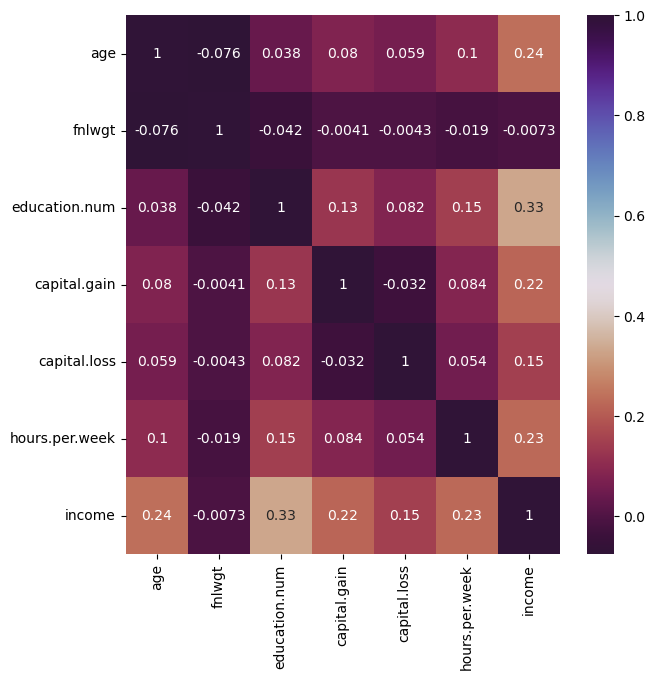

In [631]:
corr_df = data_f.select_dtypes(include = 'number')
correlation_matrix = corr_df.corr()
plt.figure(figsize=(7,7)) 
sns.heatmap(correlation_matrix, annot=True, cmap='twilight_shifted_r')
plt.show()

Can drop the education column as its redundant

In [632]:
data_f = data_f.drop('education.num', axis=1)
data_f.head()

,age,workclass,fnlwgt,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,25.0,Private,226802.0,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,0
1,38.0,Private,89814.0,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,0
2,28.0,Local-gov,336951.0,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,1
3,44.0,Private,160323.0,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,1
5,34.0,Private,198693.0,10th,Never-married,Other-service,Not-in-family,White,Male,0.0,0.0,30.0,United-States,0


fnlwgt has a (-)ve correlation with income, therefore it can be dropped 

In [633]:
data_f = data_f.drop('fnlwgt', axis=1)
data_f.head()

,age,workclass,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,25.0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,0
1,38.0,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,0
2,28.0,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,1
3,44.0,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,1
5,34.0,Private,10th,Never-married,Other-service,Not-in-family,White,Male,0.0,0.0,30.0,United-States,0


One Hot Encoding , for categorical columns


In [634]:
str_cols = data_f.columns[data_f.dtypes == object].tolist()
data_f = pd.get_dummies(data_f, columns=str_cols) # one hot encoding
data_f

,age,capital.gain,capital.loss,hours.per.week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
0,25.0,0.0,0.0,40.0,0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
1,38.0,0.0,0.0,50.0,0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
2,28.0,0.0,0.0,40.0,1,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,44.0,7688.0,0.0,40.0,1,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
5,34.0,0.0,0.0,30.0,0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27.0,0.0,0.0,38.0,0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
48838,40.0,0.0,0.0,40.0,1,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
48839,58.0,0.0,0.0,40.0,0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
48840,22.0,0.0,0.0,20.0,0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False


Min Max scaler , for numerical columns 

In [635]:
from sklearn.preprocessing import MinMaxScaler

scalable_columns = ['age','capital.gain','capital.loss','hours.per.week'] 
min_max_scaler = MinMaxScaler() # scaling the data
scaled_columns = min_max_scaler.fit_transform(data_f[scalable_columns]) 

data_f['age']=scaled_columns[:,0]
data_f['capital.gain']=scaled_columns[:,1]
data_f['capital.loss']=scaled_columns[:,2]
data_f['hours.per.week']=scaled_columns[:,3]
data_f

,age,capital.gain,capital.loss,hours.per.week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
0,0.109589,0.000000,0.0,0.397959,0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
1,0.287671,0.000000,0.0,0.500000,0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
2,0.150685,0.000000,0.0,0.397959,1,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,0.369863,0.076881,0.0,0.397959,1,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
5,0.232877,0.000000,0.0,0.295918,0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0.136986,0.000000,0.0,0.377551,0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
48838,0.315068,0.000000,0.0,0.397959,1,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
48839,0.561644,0.000000,0.0,0.397959,0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
48840,0.068493,0.000000,0.0,0.193878,0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False


Getting x(data) and y(target)

In [636]:
data = data_f.drop('income', axis=1) # splitting data into features and target
target = data_f['income']

Splitting the data to train and test

In [637]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)
x_train, y_train = SMOTE().fit_resample(x_train, y_train) # balancing the data


Random Forest Classifier with Hyperparameters set as default

In [638]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

r_forest_Model = RandomForestClassifier(random_state=42) # creating the random forest model
r_forest_Model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [639]:
y_Pred = r_forest_Model.predict(x_test) # predicting the test data
accuracy_score(y_test, y_Pred)

0.829519071310116

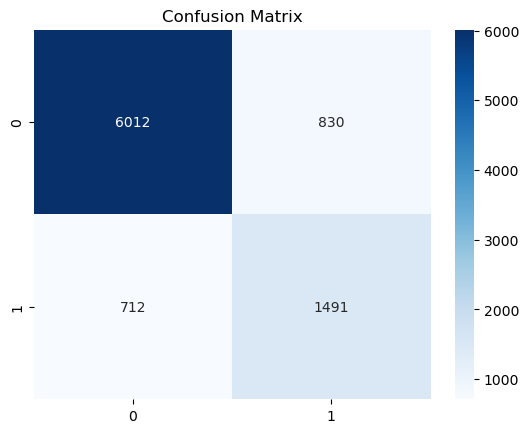

In [640]:
cm = confusion_matrix(y_test, y_Pred) # confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel = 'Predicted'
plt.ylabel = 'Actual'
plt.title('Confusion Matrix')
plt.show()

In [641]:
print(classification_report(y_test, y_Pred)) # classification report


              precision    recall  f1-score   support

           0       0.89      0.88      0.89      6842
           1       0.64      0.68      0.66      2203

    accuracy                           0.83      9045
   macro avg       0.77      0.78      0.77      9045
weighted avg       0.83      0.83      0.83      9045



Random Forest Classifier with changed Hyperparameters ( random_state=42,max_leaf_nodes=5000)

In [642]:
ran_forest = RandomForestClassifier(random_state=42,max_leaf_nodes=5000) # setting the max leaf nodes to 5000
ran_forest.fit(x_train, y_train)

RandomForestClassifier(max_leaf_nodes=5000, random_state=42)

In [643]:
Pred = ran_forest.predict(x_test)
accuracy_score(y_test,Pred)

0.8363736871199557

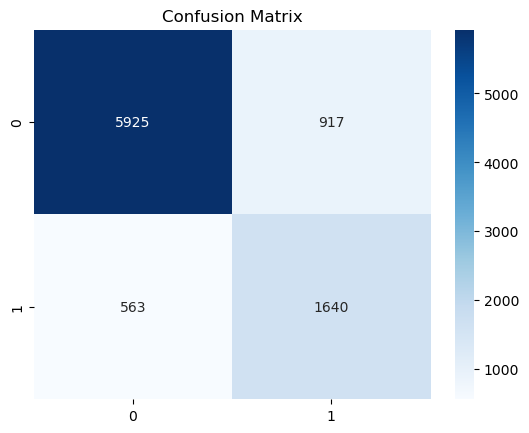

In [644]:
cm = confusion_matrix(y_test, Pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel = 'Predicted'
plt.ylabel = 'Actual'
plt.title('Confusion Matrix')
plt.show()

In [645]:
print(classification_report(y_test,Pred))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89      6842
           1       0.64      0.74      0.69      2203

    accuracy                           0.84      9045
   macro avg       0.78      0.81      0.79      9045
weighted avg       0.85      0.84      0.84      9045



Random forest with changed hyper parameters (random_state=42, max_depth=200)

In [646]:
r_forest = RandomForestClassifier(random_state=42,max_depth=200) # setting the max depth to 200
r_forest.fit(x_train, y_train)

RandomForestClassifier(max_depth=200, random_state=42)

In [647]:
RPred = r_forest.predict(x_test)
accuracy_score(y_test,RPred)

0.829519071310116

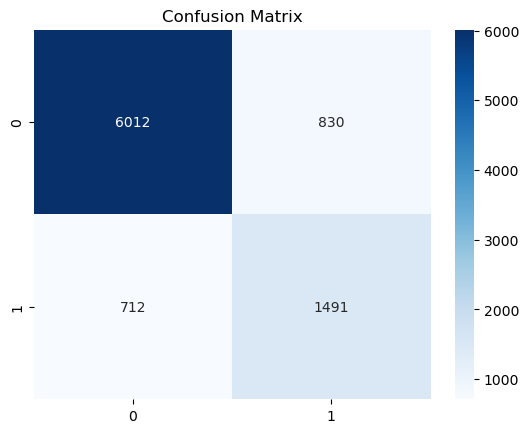

In [648]:
cm = confusion_matrix(y_test, RPred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel = 'Predicted'
plt.ylabel = 'Actual'
plt.title('Confusion Matrix')
plt.show()

In [649]:
print(classification_report(y_test,RPred))

              precision    recall  f1-score   support

           0       0.89      0.88      0.89      6842
           1       0.64      0.68      0.66      2203

    accuracy                           0.83      9045
   macro avg       0.77      0.78      0.77      9045
weighted avg       0.83      0.83      0.83      9045



Random Forest Classifier with changed Hyperparameters (min_samples_split=5,random_state=42,min_samples_leaf=5)

In [650]:
random_forest = RandomForestClassifier(random_state=42,min_samples_split=5,min_samples_leaf=5)
random_forest.fit(x_train, y_train)

RandomForestClassifier(min_samples_leaf=5, min_samples_split=5, random_state=42)

In [651]:
Pred1 = random_forest.predict(x_test)
accuracy_score(y_test,Pred1)

0.81934770591487

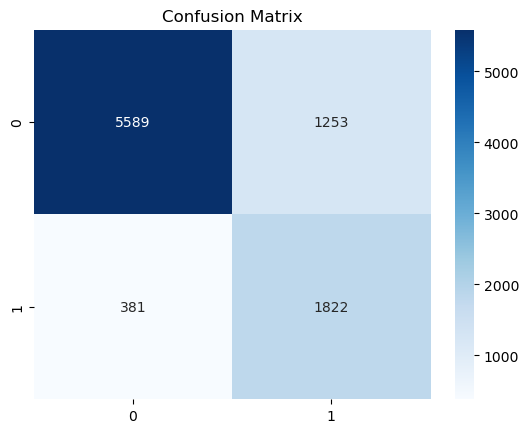

In [652]:
cm = confusion_matrix(y_test, Pred1)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel = 'Predicted'
plt.ylabel = 'Actual'
plt.title('Confusion Matrix')
plt.show()

In [653]:
print(classification_report(y_test,Pred1))

              precision    recall  f1-score   support

           0       0.94      0.82      0.87      6842
           1       0.59      0.83      0.69      2203

    accuracy                           0.82      9045
   macro avg       0.76      0.82      0.78      9045
weighted avg       0.85      0.82      0.83      9045



Navie bayes Multinomial model 

In [654]:
from sklearn.naive_bayes import MultinomialNB

naive_bayes = MultinomialNB()
naive_bayes.fit(x_train, y_train)

MultinomialNB()

In [655]:
nPred = naive_bayes.predict(x_test)
accuracy_score(y_test,nPred)

0.7543394140409065

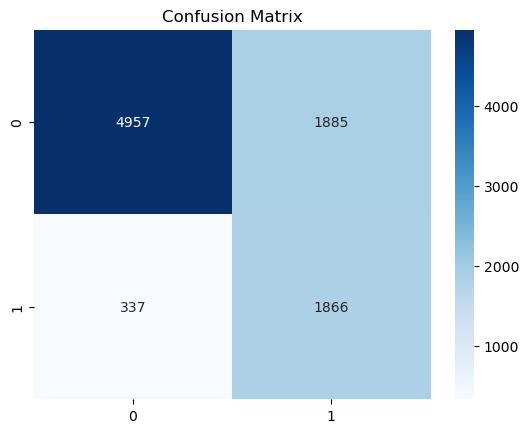

In [656]:
cm = confusion_matrix(y_test, nPred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel = 'Predicted'
plt.ylabel = 'Actual'
plt.title('Confusion Matrix')
plt.show()

In [657]:
print(classification_report(y_test,nPred))

              precision    recall  f1-score   support

           0       0.94      0.72      0.82      6842
           1       0.50      0.85      0.63      2203

    accuracy                           0.75      9045
   macro avg       0.72      0.79      0.72      9045
weighted avg       0.83      0.75      0.77      9045



Navie bayes Guassian model

In [658]:
from sklearn.naive_bayes import GaussianNB

naive_bayesG = GaussianNB()
naive_bayesG.fit(x_train, y_train)

GaussianNB()

In [659]:
ngPred = naive_bayesG.predict(x_test)
accuracy_score(y_test,ngPred)

0.6026533996683251

Plotting the ROC curve for the 3 models

ROC of Random Forest: 0.8793162654682973
ROC of Gaussian NB: 0.8310020230975723
ROC of Multinomial NB: 0.8742371587308263


Text(0.5, 1.0, 'ROC Curve')

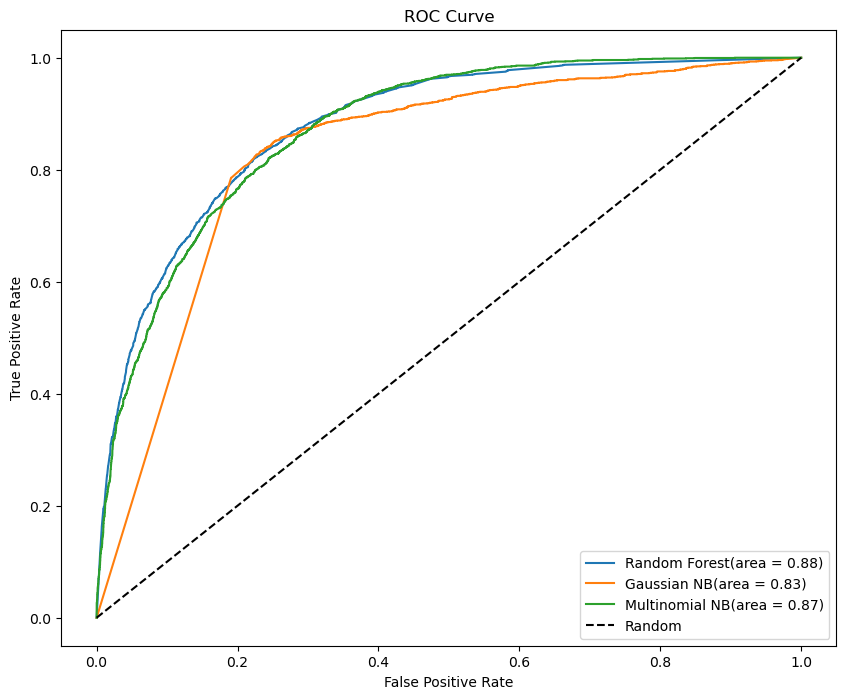

In [660]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as pt

xr_train, xr_test, yr_train, yr_test = train_test_split(data, target, test_size=0.2, random_state=42)
xr_train, yr_train = SMOTE().fit_resample(xr_train, yr_train)

r = RandomForestClassifier(random_state=42)
ng = GaussianNB()
nM = MultinomialNB()

r.fit(xr_train, yr_train)
ng.fit(xr_train, yr_train)
nM.fit(xr_train, yr_train)

pred_r = r.predict_proba(xr_test)[:,1]  # predicting the probabilities
pred_ng = ng.predict_proba(xr_test)[:,1]
pred_nM = nM.predict_proba(xr_test)[:,1]


r_roc = roc_auc_score(yr_test, pred_r) # calculating the roc score
print(f"ROC of Random Forest: {r_roc}")
ng_roc = roc_auc_score(yr_test, pred_ng)
print(f"ROC of Gaussian NB: {ng_roc}")
nM_roc = roc_auc_score(yr_test, pred_nM)
print(f"ROC of Multinomial NB: {nM_roc}")

fpr_r, tpr_r, thresholds_r = roc_curve(yr_test, pred_r) # calculating the fpr and tpr
fpr_ng, tpr_ng, thresholds_ng = roc_curve(yr_test, pred_ng)
fpr_nM, tpr_nM, thresholds_nM = roc_curve(yr_test, pred_nM)

plt.figure(figsize=(10,8)) # plotting the roc curve
plt.plot(fpr_r, tpr_r, label=f"Random Forest(area = {r_roc:.2f})") 
plt.plot(fpr_ng, tpr_ng, label=f"Gaussian NB(area = {ng_roc:.2f})")
plt.plot(fpr_nM, tpr_nM, label=f"Multinomial NB(area = {nM_roc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.gca().set_xlabel('False Positive Rate')
plt.gca().set_ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.title('ROC Curve')